<a href="https://colab.research.google.com/github/SweetlinN/Student_performance_predict/blob/main/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# students performance prediction

# 1.import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# 2. Load dataset

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving Student_Performance (1).csv to Student_Performance (1) (2).csv


In [ ]:

Student_data = pd.read_csv('Student_Performance (1).csv')

In [ ]:
# first five rows of the dataset

In [ ]:
Student_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# last five rows of the dataset

In [ ]:
Student_data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


# 3. Exploratory Data Analysis (EDA)

In [ ]:
# check data types

In [ ]:
Student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
# check the nullvalues

In [ ]:
Student_data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
Student_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
# check how many rows and columns

In [ ]:
Student_data.shape

(10000, 6)

# 4.feature creation

In [ ]:
Student_data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
# categorical to numeric columns

In [ ]:
# Extracurricular Activities
Student_data['Extracurricular Activities'].value_counts()

,count
Extracurricular Activities,
No,5052
Yes,4948


In [ ]:
le = LabelEncoder()
for col in ['Extracurricular Activities']:
    Student_data[col] = le.fit_transform(Student_data[col])

In [ ]:
Student_data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


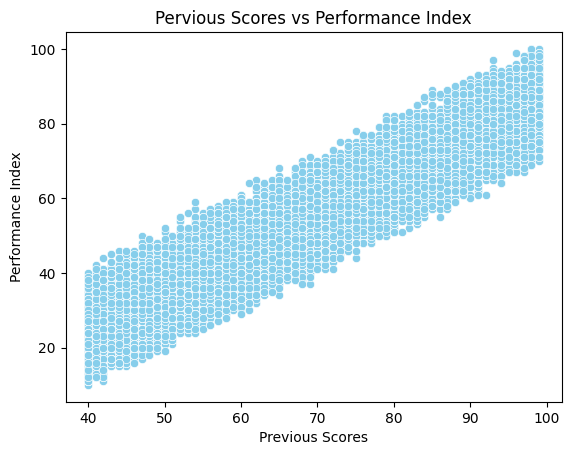

In [ ]:
# data visualization
sns.scatterplot(x="Previous Scores",y="Performance Index",color="skyblue",data=Student_data)
plt.title("Pervious Scores vs Performance Index")
plt.show()

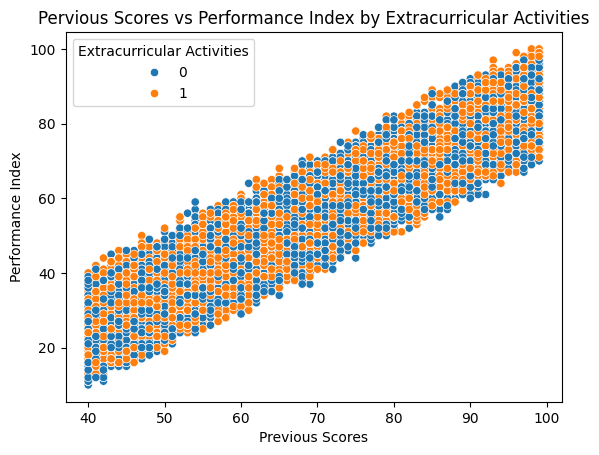

In [ ]:

sns.scatterplot(x="Previous Scores",y="Performance Index",hue="Extracurricular Activities",color="skyblue",data=Student_data)
plt.title("Pervious Scores vs Performance Index by Extracurricular Activities")
plt.show()

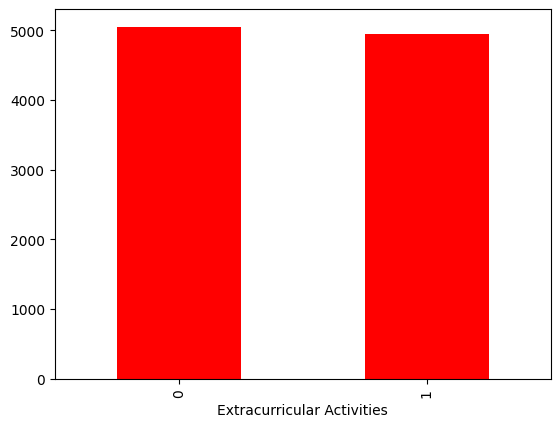

Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64


In [ ]:
Student_data["Extracurricular Activities"].value_counts().plot(kind="bar",color="red")
plt.show()
print(Student_data["Extracurricular Activities"].value_counts())

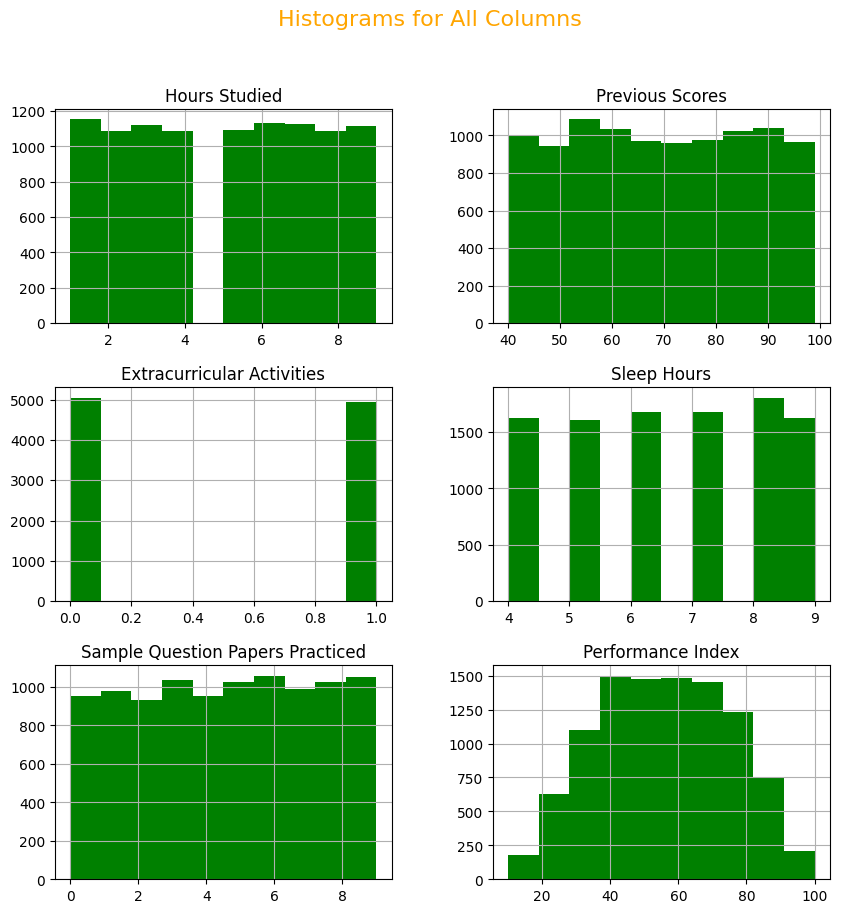

In [ ]:
Student_data.hist(figsize=(10, 10), color='green',bins=10)
plt.suptitle("Histograms for All Columns",color='orange',fontsize=16)
plt.show()

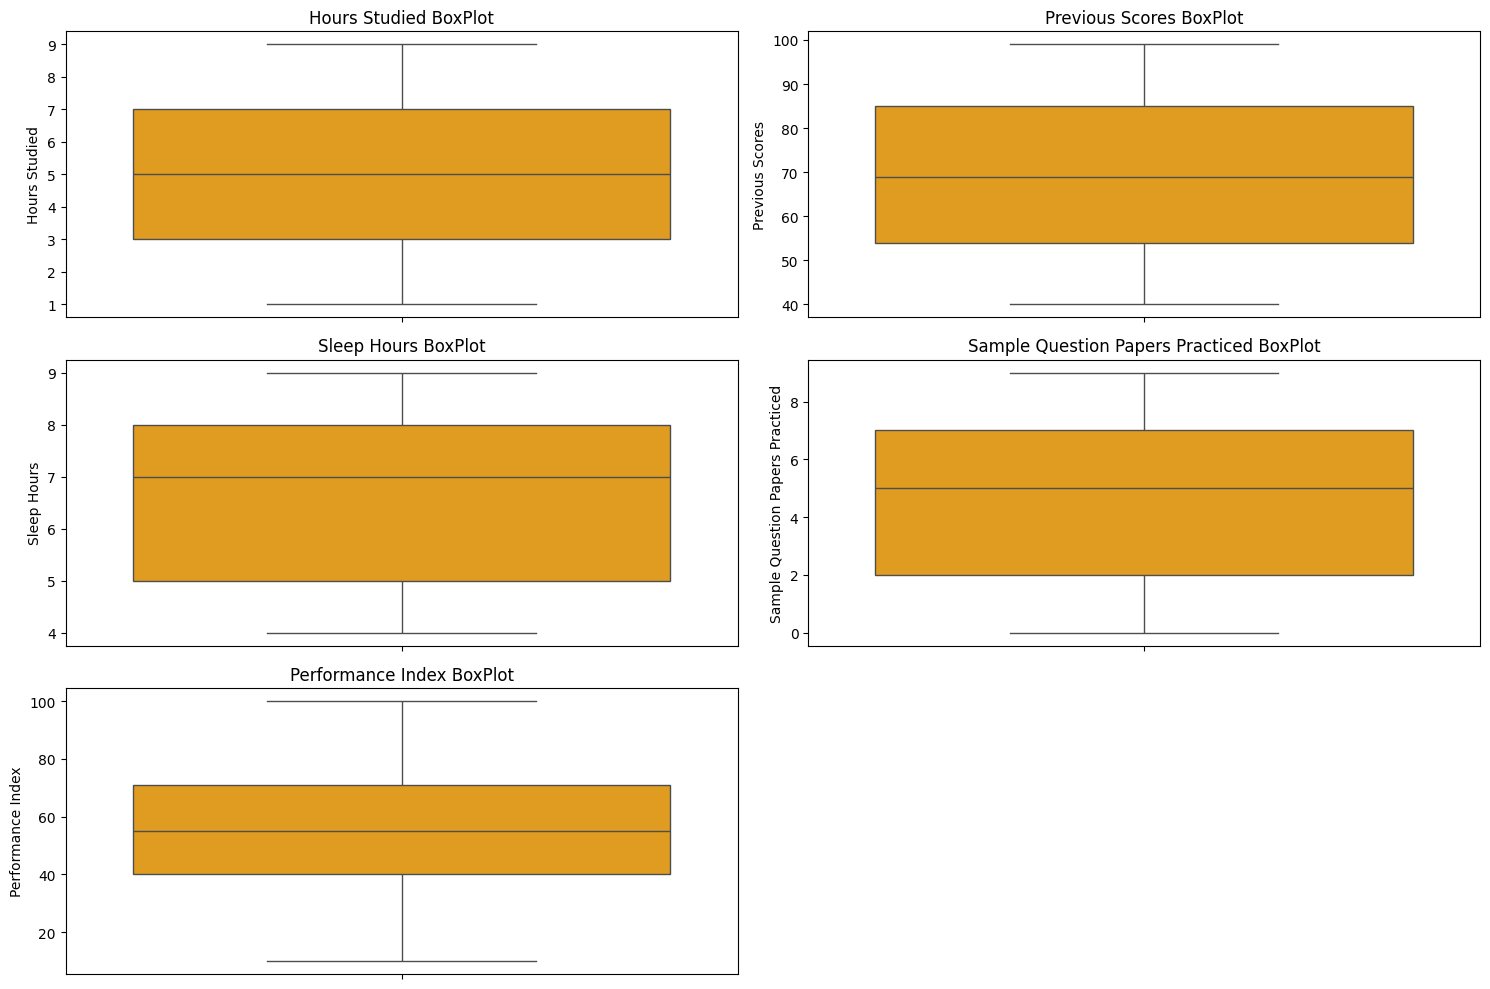

In [ ]:

# check outliers
plt.figure(figsize=(15,10))
for i,col in enumerate(["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced","Performance Index"]):
    plt.subplot(3,2,i+1)
    sns.boxplot(Student_data[col],color="orange")
    plt.title(f"{col} BoxPlot")
    plt.xlabel("")
plt.tight_layout()
plt.show()

# 5. Split training data and testing data

In [ ]:

from sklearn.model_selection import train_test_split

X = Student_data.drop("Performance Index",axis=1)
y = Student_data["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print((f"X train shape : {X_train.shape}"))
print(f"X test shape : {X_test.shape}")

X train shape : (7500, 5)
X test shape : (2500, 5)


In [ ]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [ ]:
y

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_scaler = ["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"]
X_train[cols_for_scaler] = scaler.fit_transform(X_train[cols_for_scaler])
X_test[cols_for_scaler] = scaler.transform(X_test[cols_for_scaler])

In [ ]:
X_train.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4901,0.007963,-1.190621,0,-0.908749,0.133144
4375,0.778549,1.059026,1,-1.497318,1.531225
6698,-0.762623,1.405126,1,0.268387,-1.264937


# 6.model training and prediction and evaluate

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def calculate_model_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso": Lasso(),
    "Ridge" : Ridge(),
    "Elasticnet": ElasticNet(),
    "K-Neighbors Regressor"  : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metrics(y_test, y_test_pred)

    print(list(models.values())[i])

    print("RMSE :", model_test_rmse)
    print("Mean Absolute Error :", model_test_mae)
    print("R2 Score :", model_test_r2)

    print("--------------------------------------------")

LinearRegression()
RMSE : 2.0081195719924425
Mean Absolute Error : 1.5975792091646097
R2 Score : 0.9890550757439104
--------------------------------------------
Lasso()
RMSE : 2.719967426103645
Mean Absolute Error : 2.1463121489990185
R2 Score : 0.97992012391189
--------------------------------------------
Ridge()
RMSE : 2.00828619245285
Mean Absolute Error : 1.5977107881295
R2 Score : 0.9890532593939269
--------------------------------------------
ElasticNet()
RMSE : 7.2336597639260845
Mean Absolute Error : 6.01675897409234
R2 Score : 0.8579799117929845
--------------------------------------------
KNeighborsRegressor()
RMSE : 2.964364350075746
Mean Absolute Error : 2.37488
R2 Score : 0.9761495385578247
--------------------------------------------
DecisionTreeRegressor()
RMSE : 2.9904979146920967
Mean Absolute Error : 2.3584666666666663
R2 Score : 0.9757271579267921
--------------------------------------------
RandomForestRegressor()
RMSE : 2.2726795321661015
Mean Absolute Error : 1.81